In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lendo e transformando o arquivo CSV em um objeto pandas DataFrame nomeado de "df"
df = pd.read_csv('C:/Users/juan_/Documents/GitHub/Datasets/demand.csv')

In [3]:
#Verificando o head e tail do CSV
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [4]:
#Analisando algumas informações a respeito do DataFrame
df.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [5]:
#Verificando a existência de dados não preenchidos no DataFrame
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [6]:
#Verificando a relação de dados faltantes com o total de dados
x = (11239/1048575)*100
print(f'Os dados faltantes equivalem à {round(x,3)}% do total dos dados do DataFrame')

Os dados faltantes equivalem à 1.072% do total dos dados do DataFrame


In [7]:
#Os dados não preenchidos beiram 1% do total dos dados, sendo assim, resolvi dropar os dados. 
#Outro motivo para dropar os dados é que não era possível estimar os dados faltantes.

#Dropando as linhas dos dados faltantes e atualizando o DF.
df.dropna(inplace=True)
df.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [8]:
#Não está no notebook, mas alguns números possuíam parenteses, o código abaixo é para retirar esses parenteses (servirá lá na frente)
df['Order_Demand']=df['Order_Demand'].str.replace('(','',regex=True)
df['Order_Demand']=df['Order_Demand'].str.replace(')','',regex=True)

In [9]:
#O código abaixo separa os valores das datas, e após isso, cada valor é atribuído a uma nova coluna no DataFrame
df[['Year','Month','Day']] = df['Date'].str.split("/", expand = True)
df[['Month']] = df[['Month']].astype(int)
df[['Year']] = df[['Year']].astype(int)
#df[['Day']] = df[['Day']].astype(int)

#A retirada dos parenteses dos números foi necessário na hora de converter a coluna "Order_Demand" de str para int
df[['Order_Demand']] = df[['Order_Demand']].astype(int)


In [10]:
#Ordenando o DataFrame pela Data
df.sort_values('Date', inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day
0,Product_0965,Whse_A,Category_006,2011/1/8,2,2011,1,8
1,Product_0412,Whse_S,Category_007,2011/10/20,2,2011,10,20
2,Product_0125,Whse_S,Category_011,2011/10/20,2,2011,10,20
3,Product_0642,Whse_C,Category_019,2011/10/31,3,2011,10,31
4,Product_2137,Whse_S,Category_009,2011/11/18,25,2011,11,18
...,...,...,...,...,...,...,...,...
1037331,Product_0689,Whse_J,Category_011,2017/1/6,200,2017,1,6
1037332,Product_1970,Whse_J,Category_005,2017/1/6,2000,2017,1,6
1037333,Product_1904,Whse_C,Category_019,2017/1/9,4000,2017,1,9
1037334,Product_0471,Whse_C,Category_015,2017/1/9,30,2017,1,9


In [11]:
###df['Date'] =pd.to_datetime(df['Date'])

In [12]:
#Verificando a quantidade de registros de cada armazens
df[['Warehouse']].value_counts()

Warehouse
Whse_J       764447
Whse_A       142335
Whse_S        88200
Whse_C        42354
dtype: int64

In [13]:
#df.set_index('Date',inplace=True)

In [14]:
#Um DataFrame criado apena com as informações do armazém A, caso precisemos mais a frente.
df_whseA = df[(df['Warehouse']=='Whse_A')]


'''df_whseA_2012 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2012)]
df_whseA_2013 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2013)]
df_whseA_2014 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2014)]
df_whseA_2015 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2015)]
df_whseA_2016 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2016)]'''

"df_whseA_2012 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2012)]\ndf_whseA_2013 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2013)]\ndf_whseA_2014 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2014)]\ndf_whseA_2015 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2015)]\ndf_whseA_2016 = df[(df['Warehouse']=='Whse_A') & (df['Year']==2016)]"

In [15]:
#Um DataFrame criado apena com as informações do armazém C, caso precisemos mais a frente.
df_whseC = df[(df['Warehouse']=='Whse_C')]


'''df_whseC_2012 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2012)]
df_whseC_2013 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2013)]
df_whseC_2014 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2014)]
df_whseC_2015 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2015)]
df_whseC_2016 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2016)]'''

"df_whseC_2012 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2012)]\ndf_whseC_2013 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2013)]\ndf_whseC_2014 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2014)]\ndf_whseC_2015 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2015)]\ndf_whseC_2016 = df[(df['Warehouse']=='Whse_C') & (df['Year']==2016)]"

In [16]:
#Um DataFrame criado apena com as informações do armazém J, caso precisemos mais a frente.
df_whseJ = df[(df['Warehouse']=='Whse_J')]


'''df_whseJ_2012 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2012)]
df_whseJ_2013 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2013)]
df_whseJ_2014 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2014)]
df_whseJ_2015 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2015)]
df_whseJ_2016 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2016)]'''

"df_whseJ_2012 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2012)]\ndf_whseJ_2013 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2013)]\ndf_whseJ_2014 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2014)]\ndf_whseJ_2015 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2015)]\ndf_whseJ_2016 = df[(df['Warehouse']=='Whse_J') & (df['Year']==2016)]"

In [17]:
#Um DataFrame criado apena com as informações do armazém S, caso precisemos mais a frente.
df_whseS = df[(df['Warehouse']=='Whse_S')]


'''df_whseS_2012 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2012)]
df_whseS_2013 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2013)]
df_whseS_2014 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2014)]
df_whseS_2015 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2015)]
df_whseS_2016 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2016)]'''

"df_whseS_2012 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2012)]\ndf_whseS_2013 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2013)]\ndf_whseS_2014 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2014)]\ndf_whseS_2015 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2015)]\ndf_whseS_2016 = df[(df['Warehouse']=='Whse_S') & (df['Year']==2016)]"

In [18]:
#Analisando os dados do DataFrame original
xdf = df['Order_Demand'].sum()
print(df.nunique())
print(f'\nTotal of Order Demands: {xdf}')

Product_Code        2160
Warehouse              4
Product_Category      33
Date                1729
Order_Demand        3309
Year                   7
Month                 12
Day                   31
dtype: int64

Total of Order Demands: 5134173931


In [19]:
#Analisando os dados do DataFrame do armazém A
xa = df_whseA['Order_Demand'].sum()
print(df_whseA.nunique())
print(f'\nTotal of Order Demands: {xa}')

Product_Code         427
Warehouse              1
Product_Category      25
Date                1577
Order_Demand        1270
Year                   6
Month                 12
Day                   31
dtype: int64

Total of Order Demands: 147877431


In [20]:
#Analisando os dados do DataFrame do armazém C
xc = df_whseC['Order_Demand'].sum()
print(df_whseC.nunique())
print(f'\nTotal of Order Demands: {xc}')

Product_Code         244
Warehouse              1
Product_Category      16
Date                1345
Order_Demand        1797
Year                   7
Month                 12
Day                   31
dtype: int64

Total of Order Demands: 585071404


In [21]:
#Analisando os dados do DataFrame do armazém J
xj = df_whseJ['Order_Demand'].sum()
print(df_whseJ.nunique())
print(f'\nTotal of Order Demands: {xj}')

Product_Code        1625
Warehouse              1
Product_Category      25
Date                1414
Order_Demand        1653
Year                   7
Month                 12
Day                   31
dtype: int64

Total of Order Demands: 3363200396


In [22]:
#Analisando os dados do DataFrame do armazém S
xs = df_whseS['Order_Demand'].sum()
print(df_whseS.nunique())
print(f'\nTotal of Order Demands: {xs}')

Product_Code         553
Warehouse              1
Product_Category      28
Date                1576
Order_Demand        2010
Year                   7
Month                 12
Day                   31
dtype: int64

Total of Order Demands: 1038024700


In [23]:
#Talvez a saída seja somar a demanda por mês de cada produto?????
dfJ_filter = df_whseJ.groupby(by=['Product_Code','Year','Month']).sum()
dfJ_filter

Order_Demand
Product_Code Year Month              
Product_0001 2011 12              300
             2012 1              3300
                  2              2600
                  3              3100
                  4              1800
...                               ...
Product_2172 2016 7              1000
                  8               900
                  9              1200
                  10              900
                  11              900

[81768 rows x 1 columns]

<AxesSubplot:xlabel='Year,Month'>

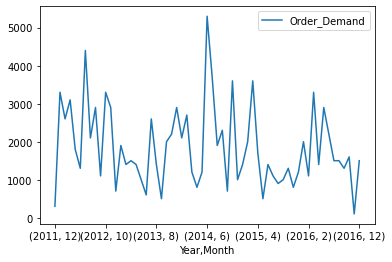

In [24]:
#Plotando o histórico mensal do produto 0001
dfJ_filter.loc['Product_0001'].plot()

<AxesSubplot:xlabel='Year,Month'>

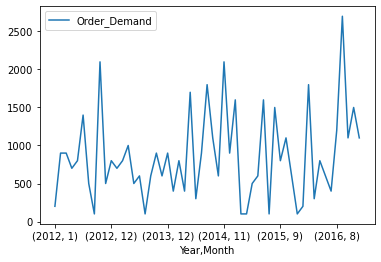

In [25]:
#Plotando o histórico mensal do produto 0009
dfJ_filter.loc['Product_0009'].plot()

<AxesSubplot:xlabel='Year,Month'>

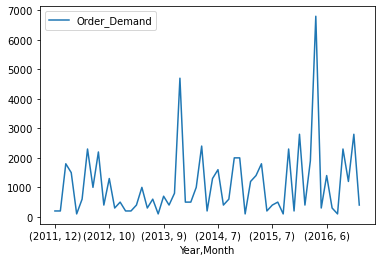

In [26]:
#Plotando o histórico mensal do produto 1001
dfJ_filter.loc['Product_1001'].plot()